In [1]:
!pip install openpyxl==3.0.0
!pip install xlrd==1.2.0
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 172 kB 4.3 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=88068a1941bf1a98dfb7b606fd3894df76377526c647dd0e33e27a768cfdcbb5
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.9
    Uninstalling openpyxl-3.0.9:
      Successfully uninstalled openpyxl-3.0.9
     |████████████████████████████████| 103 kB 3.5 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/Data Wrangling Assign."
path = "/content/drive/My Drive/Data Wrangling Assign."

Mounted at /content/drive/
euro_gdp.xlsx	  gini_index.csv       world_gdp.xls
gdp_growth_q.csv  measures_taken.xlsx


Open Datasets

**REAL GDP**

The indicator is calculated as the ratio of real GDP to the average population of a specific year. GDP measures the value of total final output of goods and services produced by an economy within a certain period of time. It includes goods and services that have markets (or which could have markets) and products which are produced by general government and non-profit institutions. It is a measure of economic activity and is also used as a proxy for the development in a country’s material living standards. However, it is a limited measure of economic welfare. For example, neither does GDP include most unpaid household work nor does GDP take account of negative effects of economic activity, like environmental degradation (Eurostat).

In [3]:
euro_gdp = pd.read_excel(path + '/euro_gdp.xlsx', engine="openpyxl")
#display(euro_gdp)

**MEASURES TAKEN**

A dataset containing, among the others, data in text form about measures taken for each country with the date of implementation of such measure. 

In [4]:
measures_taken = pd.read_excel(path + '/measures_taken.xlsx')
#display(measures_taken)

**WORLD GDP**

A dataset containing levels of GDP from 1960 to 2020 of all countries in the world

In [5]:
world_gdp = pd.read_excel(path + '/world_gdp.xls')
#display(world_gdp)

**QUARTERLY GDP GROWTH**

A dataset containing the quarterly gdp growth (wrt to the preceeding year for every country)

In [6]:
gdp_q = pd.read_csv(path + '/gdp_growth_q.csv')
#display(gdp_q)

**GINI INDEX**

The Gini index is a measure of equality in wealth distribution. A Gini index of 0 represents perfect equality, while an index of 100 implies perfect inequality (more usually, it is represented as a figure between 0-1, but its interpretation is the same).

This dataset gives the gini index (0-100) of all European countries

In [7]:
gini_eu = pd.read_csv(path + '/gini_index.csv')

As visible at first glance, those datasets are far from being ready-to-use. A lot of informations not relevant for the research question are included, data are sometimes displayed in not suitable formats, there are a lot of missing values etc. In the next section, a deep cleaning process will be applied, so that relevant analysis can be performed.

**Data Cleaning**

In [8]:
# remove rows with all NaN entries
euro_gdp = euro_gdp.dropna(axis = 0, how = 'all')
#missing data where sometimes filled with different symbols, replace such symbols with Nan
euro_gdp = euro_gdp.replace(['a','b','c','d','e','p', ':'], np.nan)
# now remove columns having all NaN entries
euro_gdp = euro_gdp.dropna(axis = 1, how = 'all')
# to change columns name, first create a suitable list of names and then use such list as columns' names
columns = [int(i) for i in euro_gdp.iloc[0,1:]]
columns.insert(0,'Country')
euro_gdp.columns = columns
# drop useless, selected columns
euro_gdp = euro_gdp.drop([7,8,9,10], axis = 0)
# reset the index and drop the automatically created column index by defining drop=True
euro_gdp = euro_gdp.reset_index(drop=True)
euro_gdp.Country[4] = 'Germany'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [9]:
display(euro_gdp)

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Belgium,29890,30110,30490,30680,31640,32200,32800.0,33760.0,33640.0,32700.0,33330.0,33460.0,33490.0,33490.0,33870.0,34360.0,34620.0,35050.0,35520.0,36090,33880,NaN
1,Bulgaria,2990,3210,3420,3620,3870,4170,4480.0,4800.0,5110.0,4970.0,5080.0,5320.0,5390.0,5390.0,5470.0,5700.0,5910.0,6120.0,6330.0,6630,6380,NaN
2,Czechia,11230,11620,11830,12260,12840,13650,14530.0,15250.0,15500.0,14690.0,15020.0,15310.0,15170.0,15160.0,15480.0,16290.0,16670.0,17490.0,17990.0,18460,17340,NaN
3,Denmark,42190,42390,42430,42490,43520,44400,45990.0,46210.0,45700.0,43220.0,43840.0,44240.0,44170.0,44410.0,44890.0,45630.0,46720.0,47740.0,48450.0,49270,48150,NaN
4,Germany,28910,29370,29290,29100,29470,29730,30930.0,31920.0,32320.0,30580.0,31940.0,33200.0,33280.0,33330.0,33920.0,34130.0,34610.0,35410.0,35690.0,35980,34310,35220
5,Estonia,7540,8040,8640,9350,10050,11070,12230.0,13230.0,12590.0,10770.0,11060.0,11890.0,12320.0,12540.0,12960.0,13230.0,13620.0,14410.0,14970.0,15510,15010,NaN
6,Ireland,33270,34490,35890,36370,38170,39460,40360.0,41240.0,38550.0,36240.0,36700.0,36940.0,36770.0,37060.0,40010.0,49620.0,50060.0,53930.0,58100.0,60130,62980,NaN
7,Greece,17430,18050,18690,19730,20670,20740,21840.0,22500.0,22370.0,21350.0,20150.0,18130.0,16940.0,16630.0,16830.0,16900.0,16890.0,17110.0,17430.0,17760,16170,NaN
8,Spain,21460,22190,22430,22680,23020,23420,24000.0,24380.0,24200.0,23100.0,23040.0,22770.0,22080.0,21840.0,22210.0,23080.0,23760.0,24430.0,24880.0,25200,22350,NaN
9,France,28930,29290,29410,29440,30050,30320,30850.0,31400.0,31310.0,30250.0,30690.0,31210.0,31160.0,31170.0,31320.0,31540.0,31770.0,32360.0,32820.0,33320,30610,NaN


In [10]:
 # this dataset is almost perfectly cleaned, only some columns have been selected
 measures_taken = measures_taken[['COUNTRY', 'REGION','LOG_TYPE', 'CATEGORY','MEASURE','COMMENTS', 'DATE_IMPLEMENTED', 'SOURCE_TYPE']]

In [11]:
 display(measures_taken)

,COUNTRY,REGION,LOG_TYPE,CATEGORY,MEASURE,COMMENTS,DATE_IMPLEMENTED,SOURCE_TYPE
0,Afghanistan,Asia,Introduction / extension of measures,Public health measures,Awareness campaigns,MoPH begins announcements on their facebook to...,2020-01-24,Government
1,Afghanistan,Asia,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,Health teams at airports will check passengers...,2020-01-26,Government
2,Afghanistan,Asia,Introduction / extension of measures,Movement restrictions,International flights suspension,Flights to China are suspended.,2020-01-27,Government
3,Afghanistan,Asia,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,Health screenings of all passengers at airports.,2020-01-27,Government
4,Afghanistan,Asia,Introduction / extension of measures,Movement restrictions,Border checks,All China and Iran nationals,2020-02-01,Government
...,...,...,...,...,...,...,...,...
23918,Zimbabwe,Africa,Introduction / extension of measures,Movement restrictions,Surveillance and monitoring,Identification/travel documents of returness w...,2020-06-09,Social media
23919,Zimbabwe,Africa,Phase-out measure,Social distancing,Closure of businesses and public services,Safari Operators for local hunting only and Na...,2020-06-30,Social media
23920,Zimbabwe,Africa,Phase-out measure,Social distancing,Closure of businesses and public services,Restaurants now allowed to serve sit-in meals ...,2020-06-30,Social media
23921,Zimbabwe,Africa,Phase-out measure,Social distancing,Schools closure,the re-opening of schools be moved from the pr...,2020-07-28,Social media


In [12]:
# also this dataset is pretty well cleaned, let's first select only some columns
gdp_q = gdp_q[['LOCATION', 'TIME','Value']]
# Now let's select only data of single countries (no aggregated data, with the only exception of OECD data)
gdp_q.LOCATION.unique()
gdp_q = gdp_q[gdp_q.LOCATION.isin(['EA19','EU27_2020','CRI','EU27_2020','OECDE', 'G-7', 'G-20']) == False].reset_index().drop('index', axis = 1)
# let's also convert the TIME column into datetime object for obvious reasons of convenience
gdp_q['TIME'] = pd.to_datetime(gdp_q['TIME'])

In [13]:
# let's now pivot the dataset in order to have dates (TIME column) as columns grouped by countries (LOCATION column)
gdp_q_p = gdp_q.pivot_table(index = 'LOCATION',columns = 'TIME', values = 'Value')
# let's keep data from 1st of January 2000
gdp_q_p = gdp_q_p.loc[:, gdp_q_p.columns >= '2000-01-01']

In [14]:
display(gdp_q_p)

TIME,2000-01-01,2000-04-01,2000-07-01,2000-10-01,2001-01-01,2001-04-01,2001-07-01,2001-10-01,2002-01-01,2002-04-01,2002-07-01,2002-10-01,2003-01-01,2003-04-01,2003-07-01,2003-10-01,2004-01-01,2004-04-01,2004-07-01,2004-10-01,2005-01-01,2005-04-01,2005-07-01,2005-10-01,2006-01-01,2006-04-01,2006-07-01,2006-10-01,2007-01-01,2007-04-01,2007-07-01,2007-10-01,2008-01-01,2008-04-01,2008-07-01,2008-10-01,2009-01-01,2009-04-01,2009-07-01,2009-10-01,...,2012-01-01,2012-04-01,2012-07-01,2012-10-01,2013-01-01,2013-04-01,2013-07-01,2013-10-01,2014-01-01,2014-04-01,2014-07-01,2014-10-01,2015-01-01,2015-04-01,2015-07-01,2015-10-01,2016-01-01,2016-04-01,2016-07-01,2016-10-01,2017-01-01,2017-04-01,2017-07-01,2017-10-01,2018-01-01,2018-04-01,2018-07-01,2018-10-01,2019-01-01,2019-04-01,2019-07-01,2019-10-01,2020-01-01,2020-04-01,2020-07-01,2020-10-01,2021-01-01,2021-04-01,2021-07-01,2021-10-01
LOCATION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ARG,26.532910,21.366906,21.762430,21.571112,24.871416,21.484401,17.720791,14.276228,16.390951,14.292038,15.592206,18.245294,27.761257,24.170415,25.283601,25.774446,31.314098,23.527540,27.539392,26.597609,32.942133,28.982473,27.141217,28.264038,34.844159,28.539904,30.556731,30.987587,37.979009,32.454275,32.073893,33.822339,38.468467,32.400943,32.510464,26.531161,30.333174,23.391608,27.435344,29.444531,...,38.847141,29.179751,33.211104,33.768438,40.591134,35.290304,34.715015,32.914872,38.012072,31.484216,30.682966,31.719179,40.670960,35.596135,35.001048,33.713018,38.789862,30.707137,31.499649,32.374446,40.768658,34.710493,35.416944,35.865087,40.055689,30.032660,30.872027,29.273179,36.843589,32.098066,32.163119,30.918828,31.854312,14.220732,29.436393,30.146293,33.148848,37.176821,37.290982,NaN
AUS,27.226026,23.300201,22.791520,21.826708,27.471077,22.785871,23.501023,24.312644,29.145813,25.258652,24.547370,24.752209,29.520728,24.153245,25.476498,26.132509,31.319221,26.419967,26.325633,26.191677,31.674300,26.292242,26.940978,27.037808,32.169720,26.602707,27.562854,28.014691,34.521918,28.896787,29.254804,28.854325,34.744927,28.938610,29.133128,28.314314,34.844522,29.292723,29.061378,29.881583,...,39.062090,32.634305,32.533341,32.472228,38.952903,32.414871,32.842245,33.232112,40.196328,33.590307,33.665541,33.622907,40.945073,33.785678,34.629869,34.770871,42.158272,35.441473,35.031981,35.866289,42.788659,35.821468,36.547661,36.329120,44.371348,37.394944,37.180565,37.047680,44.702561,37.423225,37.890733,37.973019,43.563060,30.184331,35.599865,37.639367,38.524890,41.136209,37.643616,NaN
AUT,34.153584,28.406959,28.188528,29.339457,33.607390,27.760574,27.729136,27.731577,34.187627,28.737065,28.886014,28.138802,34.335143,28.429218,28.597350,28.763185,35.565875,29.811440,30.347919,30.298913,36.122697,30.659219,30.635067,31.151679,38.258612,31.570967,32.303443,32.654468,39.518956,33.586561,33.107114,33.497165,39.777452,33.744771,32.724115,30.420845,35.450333,28.843245,29.732818,30.754002,...,40.021853,32.984384,32.699506,32.754501,39.000472,32.555529,33.064831,33.322938,39.721371,33.733128,33.257633,33.312787,40.353608,33.471018,34.026789,33.887370,41.705156,34.298503,34.686674,35.513972,42.498086,35.776434,35.920800,36.148057,43.859753,36.531383,36.358392,37.118370,44.431106,36.436842,36.852916,36.048740,38.907795,22.810346,36.694845,31.137892,32.251486,40.821977,39.628045,NaN
BEL,33.325227,27.915757,27.592230,27.960043,32.697932,27.213117,26.856510,26.494784,32.990341,27.827920,28.100366,28.341276,33.236249,27.658073,27.780872,28.184040,35.422358,29.823649,30.186436,29.997790,35.818266,29.957729,29.828676,30.324758,36.652773,30.434616,31.007561,31.550970,38.666729,32.233792,32.535015,32.263230,37.932299,31.848686,31.009860,28.924263,34.955966,28.935599,30.304681,31.411123,...,38.771459,32.230921,32.397807,32.155075,38.501121,32.496388,32.527206,32.652085,39.771715,33.031289,33.534443,33.747976,40.774780,34.366077,34.103168,34.276060,40.913370,34.322978,34.259753,34.571387,41.9148

In [15]:
# cleaning gini_index
gini_eu = gini_eu[['TIME','GEO','Value']]
# remove aggregated data, keep only single countries information
gini_eu = gini_eu[gini_eu.GEO.str.contains('Euro|Member') == False]

In [16]:
# convert to datetime
gini_eu['TIME'] = pd.to_datetime(gini_eu['TIME'], format = "%Y")
#missing data where sometimes filled with different symbols, replace such symbols with Nan
gini_eu = gini_eu.replace(':', np.nan)
# convert Value column to numeric type
gini_eu.Value = pd.to_numeric(gini_eu.Value)
#pivot table to have data displayed in  more convenient way
gini_eu_p = gini_eu.pivot_table(index = 'GEO', columns = 'TIME', values = 'Value')

In [17]:
display(gini_eu_p)

TIME,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01
GEO,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,36.8,35.4,34.3,NaN
Austria,27.4,27.6,27.0,27.6,27.2,27.2,27.9,26.8,27.5,27.0
Belgium,26.3,26.5,25.9,25.9,26.2,26.3,26.1,25.7,25.1,25.4
Bulgaria,35.0,33.6,35.4,35.4,37.0,37.7,40.2,39.6,40.8,40.0
Croatia,31.2,30.9,30.9,30.2,30.4,29.8,29.9,29.7,29.2,28.3
Cyprus,29.2,31.0,32.4,34.8,33.6,32.1,30.8,29.1,31.1,29.3
Czechia,25.2,24.9,24.6,25.1,25.0,25.1,24.5,24.0,24.0,24.2
Denmark,26.6,26.5,26.8,27.7,27.4,27.7,27.6,27.8,27.5,27.3
Estonia,31.9,32.5,32.9,35.6,34.8,32.7,31.6,30.6,30.5,30.5


**Analysis**

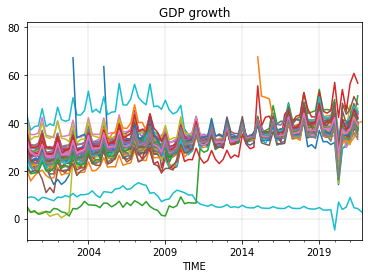

In [18]:
gdp_q_p.T.plot(legend = False)
plt.grid(linewidth = 0.3)
plt.title('GDP growth')
plt.show()

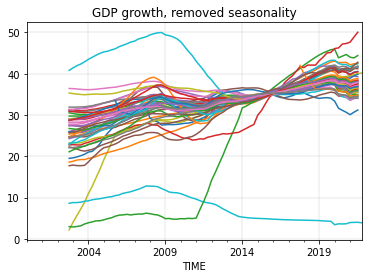

In [19]:
gdp_q_p.T.rolling(12).mean().plot(legend = False)
plt.axvline(2019, color = 'black')
plt.grid(linewidth = 0.3)
plt.title('GDP growth, removed seasonality')
plt.show()

A little bit of seasonality is removed to get a less noisy graph

Moreover, as we can note, all the countries have in common a drop in their 2020 GDP level as a result of the pandemic event.

Let's now analyse the most popular measure taken by governments

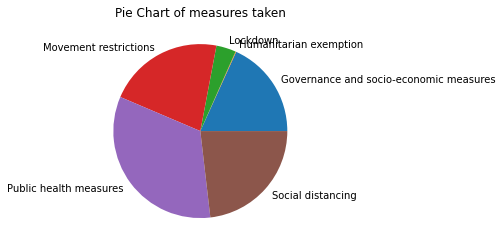

In [20]:
measures_gb = measures_taken.COUNTRY.groupby(measures_taken.CATEGORY).count()
plt.pie(measures_gb, labels = measures_gb.index)
plt.title('Pie Chart of measures taken')
plt.show()

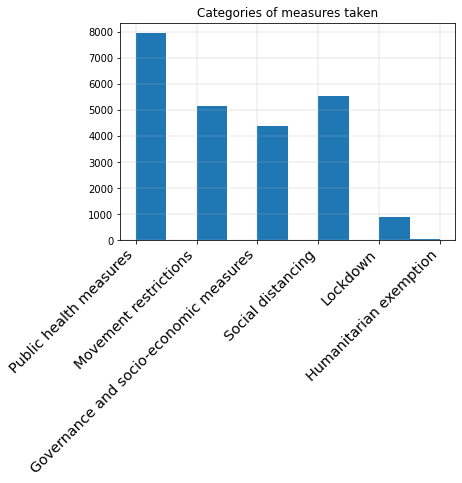

In [21]:
plt.hist(measures_taken.CATEGORY)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.title('Categories of measures taken')
plt.grid(linewidth = 0.3)
plt.show()

Interestingly, despite the perception of people, lockdown measures were not that popular among decision makers, or at least not that much. 

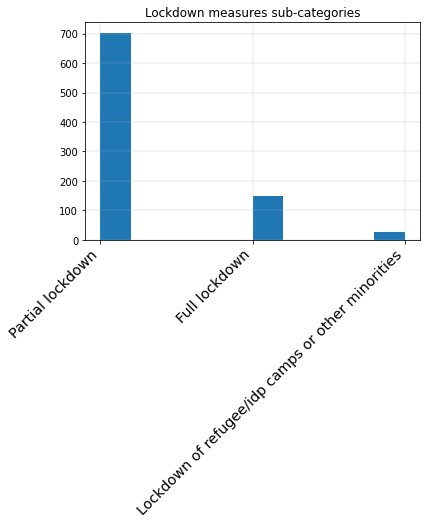

In [22]:
plt.hist(measures_taken[measures_taken.CATEGORY=='Lockdown'].MEASURE)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.title('Lockdown measures sub-categories')
plt.grid(linewidth = 0.3)
plt.show()

Moreover, analysing lockdown measure more in depth, Partial Lockdown was clearly the most adopted measure, while a Full Lockdown regime is actually 7 times less common.

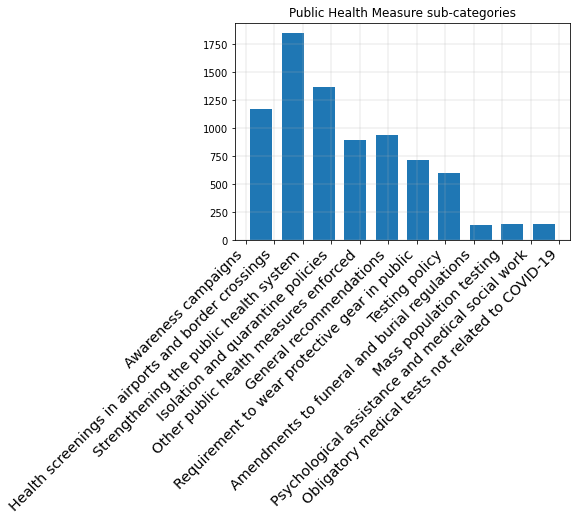

In [23]:
plt.hist(measures_taken[measures_taken.CATEGORY=='Public health measures'].MEASURE, rwidth=0.7)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.title('Public Health Measure sub-categories')
plt.grid(linewidth = 0.3)
plt.show()

It might be interesting to also analyse the sub categories of Public Health Measure. The most adopted measures are actually not that recurrent in everyday life of people, such as 'Health Screenings in airports and borders', 'Strenghtening the public health system' or are not taking away too much freedom from citizens, like 'Awareness Campaign' category.

Now, let's retrieve only European countries from the measures_taken dataset by selecting only those companies present in euro_gdp dataset

In [24]:
measures_taken_eu = measures_taken[measures_taken.COUNTRY.isin(euro_gdp.Country.unique())]

Let's retrieve, among such, those where a full lockdown measure was implemented

In [25]:
measure_eu_full_lock = measures_taken_eu[measures_taken_eu.MEASURE == 'Full lockdown'].COUNTRY

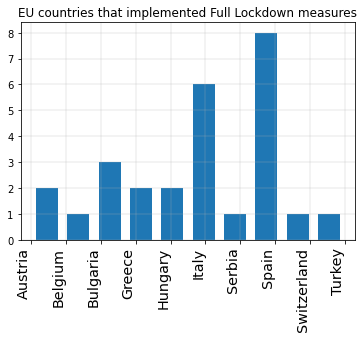

In [26]:
plt.hist(measure_eu_full_lock, rwidth = 0.7)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.title('EU countries that implemented Full Lockdown measures')
plt.grid(linewidth = 0.3)
plt.show()

In [27]:
euro_gdp_full_lock = euro_gdp[euro_gdp.Country.isin(measure_eu_full_lock.unique())]

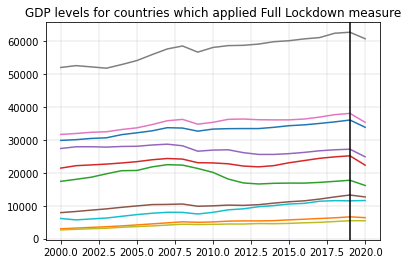

In [28]:
euro_gdp_full_lock.T.iloc[1:,:].plot(legend = False)
plt.axvline(2019, color = 'black')
plt.title('GDP levels for countries which applied Full Lockdown measure')
plt.grid(linewidth = 0.3)
plt.show()

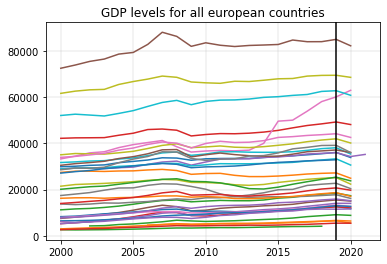

In [29]:
euro_gdp.T.iloc[1:,:].plot(legend = False)
plt.axvline(2019, color = 'black')
plt.title('GDP levels for all european countries')
plt.grid(linewidth = 0.3)
plt.show()

Add a column to euro_gdp dataset which says True or False based on wether or not the country in the row adopted a Full Lockdown measure.

In [30]:
euro_gdp['full_lock'] = euro_gdp.Country.isin(euro_gdp_full_lock.Country.unique())

In [31]:
euro_gdp['delta'] = euro_gdp.iloc[:,-3] - euro_gdp.iloc[:,-4]

In [32]:
euro_gdp_test = euro_gdp[['full_lock','delta']]

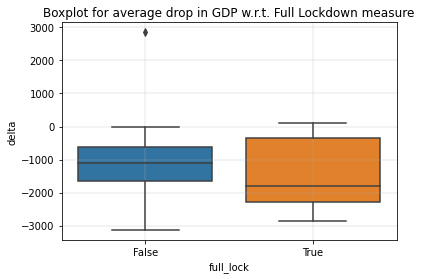

In [33]:
import seaborn as sns

sns.boxplot(x=euro_gdp.full_lock, y = euro_gdp.delta)
plt.title('Boxplot for average drop in GDP w.r.t. Full Lockdown measure')
plt.grid(linewidth = 0.3)
plt.show() 

In [34]:
from scipy.stats import fisher_exact, chi2_contingency
tab = pd.crosstab(euro_gdp.full_lock == True, euro_gdp.delta < np.quantile(euro_gdp.delta, 0.25))
print('Fisher Exact Test Statistics: ',fisher_exact(tab)[0])
print('Fisher Exact Test P-Value: ',fisher_exact(tab)[1])
print('Chi Squared Test Statistics: ',chi2_contingency(tab)[0])
print('Chi Squared Test P-Value: ',chi2_contingency(tab)[1])

Fisher Exact Test Statistics:  2.25
Fisher Exact Test P-Value:  0.38109337172021146
Chi Squared Test Statistics:  0.21875
Chi Squared Test P-Value:  0.6399940105774465


Despite the graphical analysis supports a seemingly significant difference, the statiscal tests does not confirm that hypotheses (p-values > 0.05 means no rejection of null hypothesis of independence). 

Let's see, among the countries having data both for 2019 and 2020 (unfortunately data from 2021 are not available) the amount of them where an increase in the gini index was observed. Note that an increase in the gini index corresponds to an increase of inequality in wealth distribution

In [35]:
gini_no_lock = gini_eu[gini_eu.GEO.isin(measure_eu_full_lock.unique())== False]
gini_no_loc_p = gini_no_lock.pivot_table(index = 'GEO', columns = 'TIME', values = 'Value')

In [36]:
diff_ratio = ((gini_eu_p['2019-01-01']-gini_eu_p['2020-01-01']) < 0).sum()/(len(gini_eu_p)-gini_eu_p['2020-01-01'].isna().sum())
print(diff_ratio)

0.36666666666666664


In [37]:
gini_full_lock = gini_eu[gini_eu.GEO.isin(measure_eu_full_lock.unique())]
gini_full_loc_p = gini_full_lock.pivot_table(index = 'GEO', columns = 'TIME', values = 'Value')

In [38]:
diff_ratio = ((gini_full_loc_p['2019-01-01']-gini_full_loc_p['2020-01-01']) < 0).sum()/(len(gini_full_loc_p)-gini_full_loc_p['2020-01-01'].isna().sum())
print(diff_ratio)

0.4444444444444444


In [39]:
diff_ratio = ((gini_no_loc_p['2019-01-01']-gini_no_loc_p['2020-01-01']) < 0).sum()/(len(gini_no_loc_p)-gini_no_loc_p['2020-01-01'].isna().sum())
print(diff_ratio)

0.3333333333333333


In [40]:
diff_ratio = ((gini_full_loc_p['2018-01-01']-gini_full_loc_p['2019-01-01']) < 0).sum()/(len(gini_full_loc_p)-gini_full_loc_p['2019-01-01'].isna().sum())
print(diff_ratio)

0.3


In [41]:
diff_ratio = ((gini_no_loc_p['2018-01-01']-gini_no_loc_p['2019-01-01']) < 0).sum()/(len(gini_no_loc_p)-gini_no_loc_p['2019-01-01'].isna().sum())
print(diff_ratio)

0.375


More than one third of the european countries observed an increase in inequality in wealth distribution from 2019 to 2020.

**References**

* *Acaps, COVID-19 GOVERNMENT MEASURES DATASET*

https://www.acaps.org/covid-19-government-measures-dataset 

* *World Bank Data, GDP of every country from 1960 to 2020*

https://data.worldbank.org/indicator/NY.GDP.MKTP.CD 

* *Quarterly growth of GDP in the World from 1970Q1 – 2021Q3 (note: GDP growth, not GDP)*

https://data.oecd.org/gdp/quarterly-gdp.htm

* *Europa Data, GDP of every european country from 2000 to 2020*

https://ec.europa.eu/eurostat/databrowser/view/sdg_08_10/default/table?lang=en 

* *Eurostat, Gini coefficient of equivalised disposable income -    EU-SILC survey* 

https://appsso.eurostat.ec.europa.eu/nui/setupDownloads.do 